In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

from inchworm_measurement.simulator import Simulator
from pprint import pprint
from inchworm_measurement import utils
from inchworm_measurement.laser import Laser
from scipy.spatial.transform import Rotation


５点法 (直進)

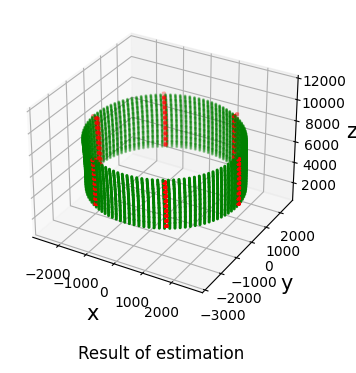

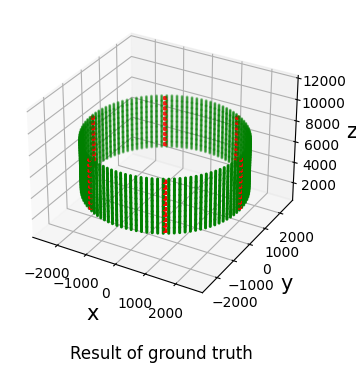

In [73]:

sigma = 0.00489 # size of pixel [mm] (nikon D800)
focal = 8 # length of focal [mm] (NIKKOR 8-15mm f/3.5-4.5E)

A = np.array([ 
    [focal/sigma, 0, 0],
    [0, focal/sigma, 0],
    [0, 0, 1]
])
base_motion= np.array([
    [[1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 100*i],
    [0, 0, 0, 1]] for i in range(1000)]
)
spotlaser_offset= np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 1000],
    [0, 0, 0, 1]
])
ringlaser_offset = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 3250],
    [0, 0, 0, 1]
])

n = 6
spotlaser_origin = np.zeros((3, n))
spotlaser_direction = np.array(
    [[np.cos(i * np.pi / n * 2), np.sin(i * np.pi / n * 2), 1] for i in range(n)]
).T

m = 100
ringlaser_origin = np.zeros((3, m))
ringlaser_direction = np.array(
    [[np.cos(i * np.pi / m * 2), np.sin(i * np.pi / m * 2), 0] for i in range(m)]
).T

simulator_params = {
    "A": A, 
    "spot_laser": Laser(spotlaser_origin, spotlaser_direction), 
    "ring_laser": Laser(ringlaser_origin, ringlaser_direction), 
    "spotlaser_offset": spotlaser_offset, 
    "ringlaser_offset": ringlaser_offset, 
    "cylinder_radius": 2500, 
    "base_motion": base_motion,
    "is_ring_with_camera": True, 
    "idx_length": 50,
    "idx_period": 5,
    "round_threshold": 0.5, 
    "is_three_points_algorithm": False, 
    "is_bundle": True, 
    "is_5points_true": False, 
    "is_scale_true": False, 
    "name": "運動直進，スポットレーザはみ出しなし"
}

S = Simulator(simulator_params)
S.run()

zlim = [500,12000]
S.show_result(zlim = zlim)
S.show_result( zlim = zlim,is_groundtruth=True)

５点法(回転)

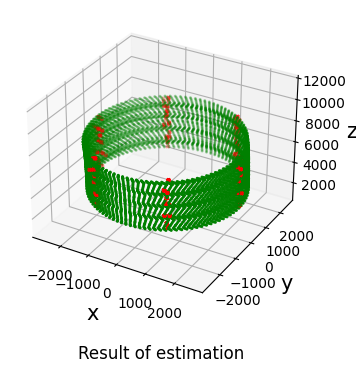

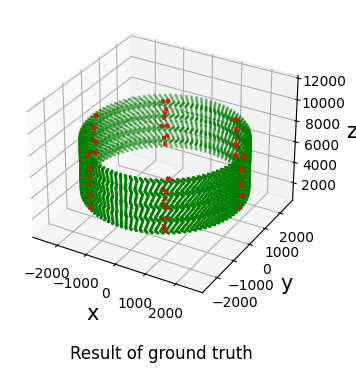

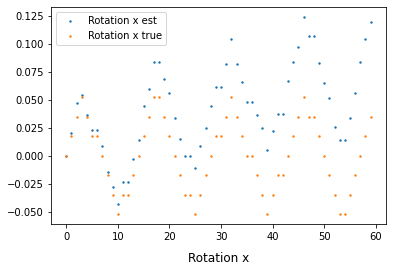

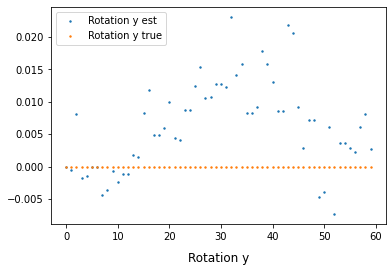

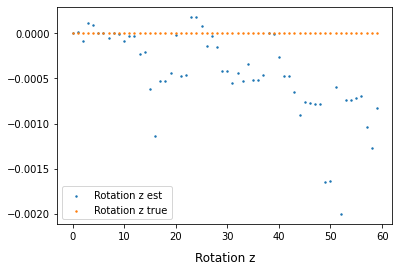

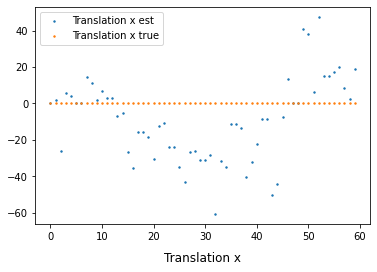

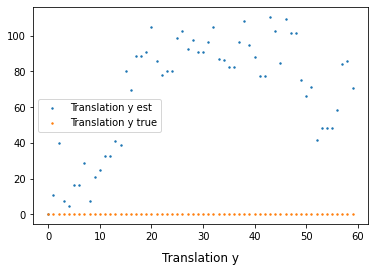

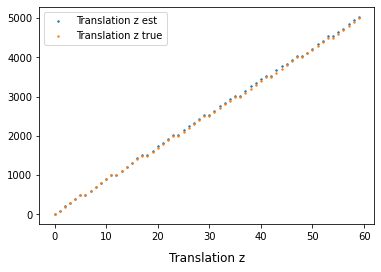

In [75]:

sigma = 0.00489 # size of pixel [mm] (nikon D800)
focal = 8 # length of focal [mm] (NIKKOR 8-15mm f/3.5-4.5E)

A = np.array([ 
    [focal/sigma, 0, 0],
    [0, focal/sigma, 0],
    [0, 0, 1]
])
base_motion = []
for i in range(1000):
    max_deg = 3
    deg = (np.min([(i+max_deg)%(max_deg*4), (-(i+max_deg)%(max_deg*4))])-max_deg)
    R = Rotation.from_rotvec([deg*np.pi/180,0,0]).as_matrix()
    t = np.array([[0,0, 100*i]]).T
    base_motion.append(np.vstack([np.hstack([R,t]), np.array([[0,0,0,1]])]))
base_motion = np.array(base_motion)

spotlaser_offset= np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 1000],
    [0, 0, 0, 1]
])
ringlaser_offset = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 3250],
    [0, 0, 0, 1]
])

n = 6
spotlaser_origin = np.zeros((3, n))
spotlaser_direction = np.array(
    [[np.cos(i * np.pi / n * 2), np.sin(i * np.pi / n * 2), 1] for i in range(n)]
).T

m = 100
ringlaser_origin = np.zeros((3, m))
ringlaser_direction = np.array(
    [[np.cos(i * np.pi / m * 2), np.sin(i * np.pi / m * 2), 0] for i in range(m)]
).T

simulator_params = {
    "A": A, 
    "spot_laser": Laser(spotlaser_origin, spotlaser_direction), 
    "ring_laser": Laser(ringlaser_origin, ringlaser_direction), 
    "spotlaser_offset": spotlaser_offset, 
    "ringlaser_offset": ringlaser_offset, 
    "cylinder_radius": 2500, 
    "base_motion": base_motion,
    "is_ring_with_camera": True, 
    "idx_length": 50,
    "idx_period": 5,
    "round_threshold": 0.5, 
    "is_three_points_algorithm": False, 
    "is_bundle": True, 
    "is_5points_true": False, 
    "is_scale_true": False, 
    "name": "運動直進，スポットレーザはみ出しなし"
}

S = Simulator(simulator_params)
S.run()

zlim = [500,12000]
S.show_result(zlim = zlim)
S.show_result( zlim = zlim,is_groundtruth=True)

S.plot_pose()

３点法（直進，はみ出しなし）

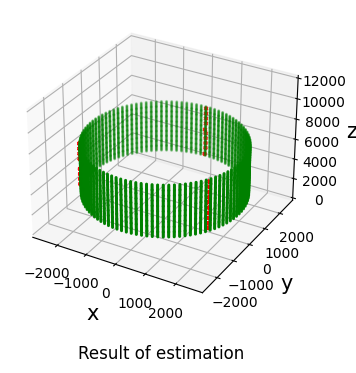

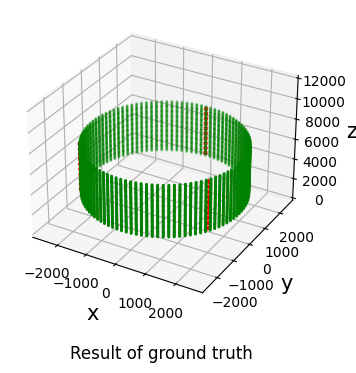

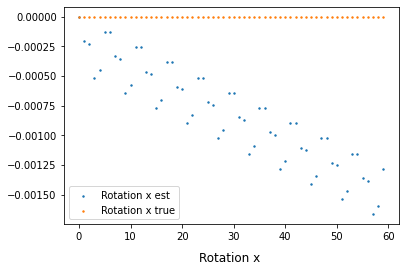

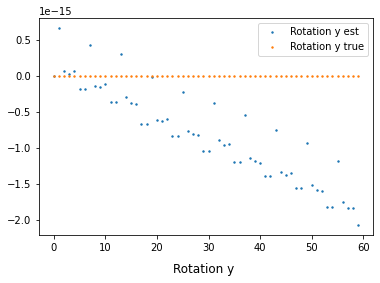

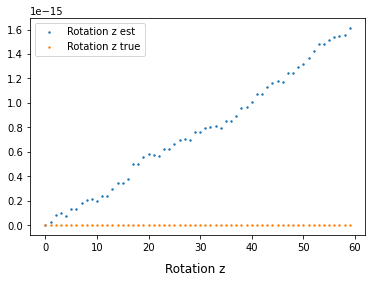

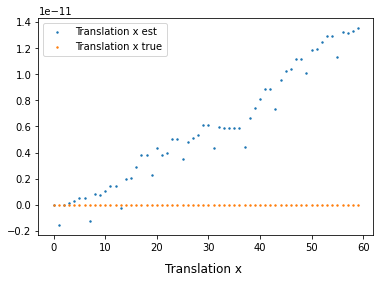

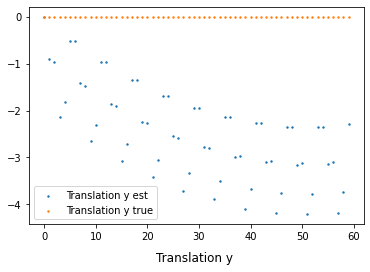

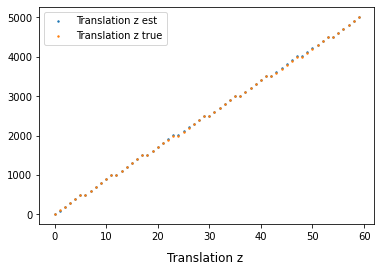

In [63]:

sigma = 0.00489 # size of pixel [mm] (nikon D800)
focal = 8 # length of focal [mm] (NIKKOR 8-15mm f/3.5-4.5E)

A = np.array([ \
    [focal/sigma, 0, 0],\
    [0, focal/sigma, 0],\
    [0, 0, 1]\
])
base_motion= np.array([
    [[1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 100*i],
    [0, 0, 0, 1]] for i in range(1000)]
)
spotlaser_offset= np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 1000],
    [0, 0, 0, 1]
])
ringlaser_offset = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 2500],
    [0, 0, 0, 1]
])

spotlaser_origin = np.zeros((3, 3))
spotlaser_direction = np.array([
    [0, np.sqrt(2)/np.sqrt(3), 1/np.sqrt(3)],
    [1/np.sqrt(2), -1/np.sqrt(6), 1/np.sqrt(3)],
    [-1/np.sqrt(2), -1/np.sqrt(6), 1/np.sqrt(3)],
]).T

m = 100
ringlaser_origin = np.zeros((3, m))
ringlaser_direction = np.array(
    [[np.cos(i * np.pi / m * 2), np.sin(i * np.pi / m * 2), 0] for i in range(m)]
).T

simulator_params = {
    "A": A, 
    "spot_laser": Laser(spotlaser_origin, spotlaser_direction), 
    "ring_laser": Laser(ringlaser_origin, ringlaser_direction), 
    "spotlaser_offset": spotlaser_offset, 
    "ringlaser_offset": ringlaser_offset, 
    "cylinder_radius": 2500, 
    "base_motion": base_motion,
    "is_ring_with_camera": True, 
    "idx_length": 50,
    "idx_period": 5,
    "round_threshold": 0.5, 
    "is_three_points_algorithm": True, 
    "is_bundle": True, 
    "is_5points_true": False, 
    "is_scale_true": False, 
    "name": "運動直進，スポットレーザはみ出しなし"
}

S = Simulator(simulator_params)
S.run()
print(S.error)

zlim = [0,12000]
S.show_result(zlim = zlim)
S.show_result( zlim = zlim,is_groundtruth=True)

S.plot_pose()

３点法（直進，はみ出しあり）

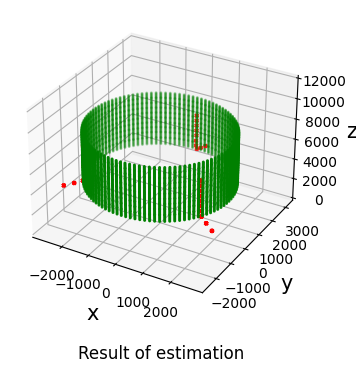

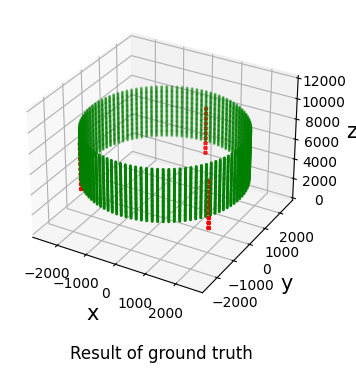

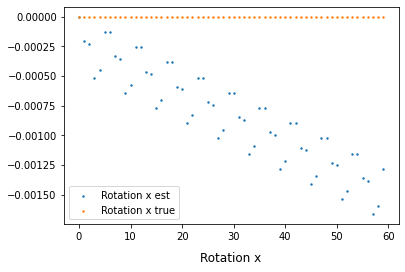

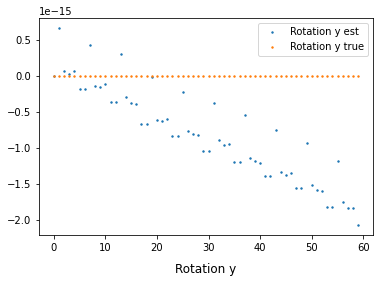

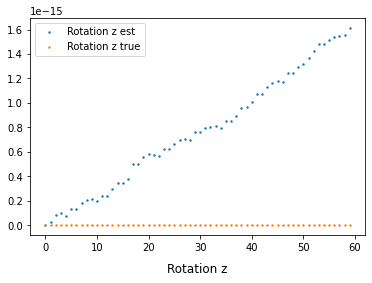

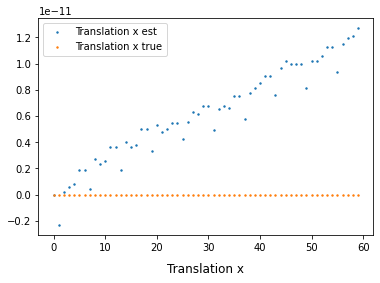

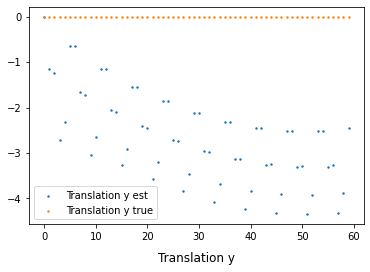

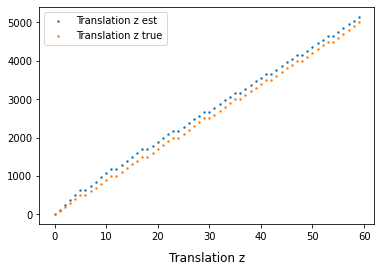

In [67]:

sigma = 0.00489 # size of pixel [mm] (nikon D800)
focal = 8 # length of focal [mm] (NIKKOR 8-15mm f/3.5-4.5E)

A = np.array([ \
    [focal/sigma, 0, 0],\
    [0, focal/sigma, 0],\
    [0, 0, 1]\
])
base_motion= np.array([
    [[1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 100*i],
    [0, 0, 0, 1]] for i in range(1000)]
)
spotlaser_offset= np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 1000],
    [0, 0, 0, 1]
])
ringlaser_offset = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 4000],
    [0, 0, 0, 1]
])

spotlaser_origin = np.zeros((3, 3))
spotlaser_direction = np.array([
    [0, np.sqrt(2)/np.sqrt(3), 1/np.sqrt(3)],
    [1/np.sqrt(2), -1/np.sqrt(6), 1/np.sqrt(3)],
    [-1/np.sqrt(2), -1/np.sqrt(6), 1/np.sqrt(3)],
]).T

m = 100
ringlaser_origin = np.zeros((3, m))
ringlaser_direction = np.array(
    [[np.cos(i * np.pi / m * 2), np.sin(i * np.pi / m * 2), 0] for i in range(m)]
).T

simulator_params = {
    "A": A, 
    "spot_laser": Laser(spotlaser_origin, spotlaser_direction), 
    "ring_laser": Laser(ringlaser_origin, ringlaser_direction), 
    "spotlaser_offset": spotlaser_offset, 
    "ringlaser_offset": ringlaser_offset, 
    "cylinder_radius": 2500, 
    "base_motion": base_motion,
    "is_ring_with_camera": True, 
    "idx_length": 50,
    "idx_period": 5,
    "round_threshold": 0.5, 
    "is_three_points_algorithm": True, 
    "is_bundle": True, 
    "is_5points_true": False, 
    "is_scale_true": False, 
    "name": "運動直進，スポットレーザはみ出しあり"
}

S = Simulator(simulator_params)
S.run()
print(S.error)

zlim = [0,12000]
S.show_result(zlim = zlim)
S.show_result( zlim = zlim,is_groundtruth=True)

S.plot_pose()

３点法（回転）

True
60.063263554906364


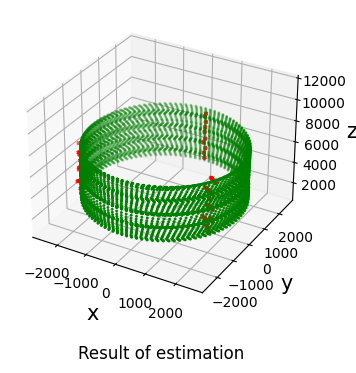

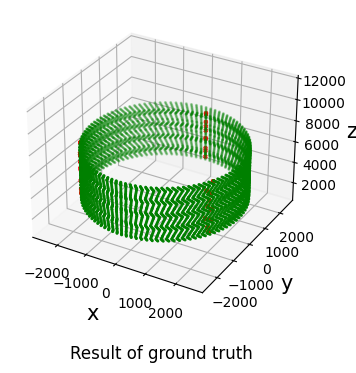

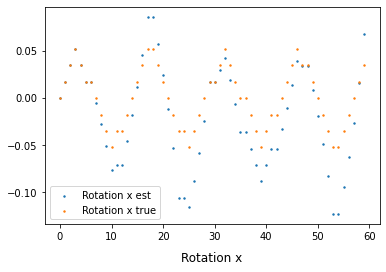

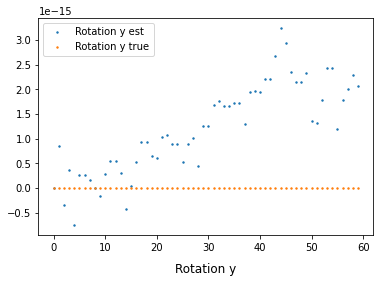

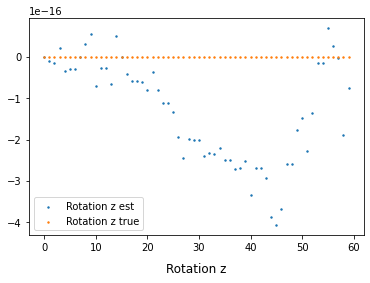

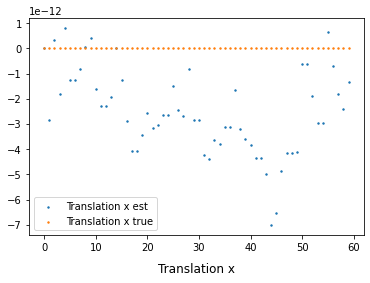

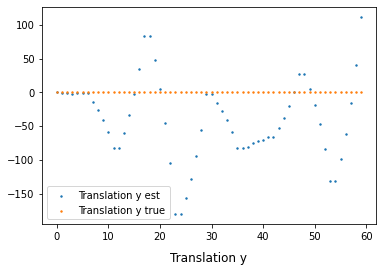

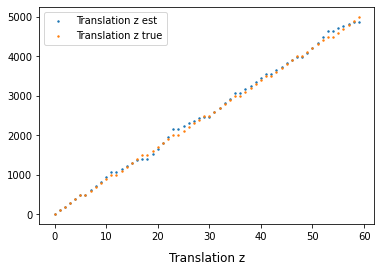

In [72]:

sigma = 0.00489 # size of pixel [mm] (nikon D800)
focal = 8 # length of focal [mm] (NIKKOR 8-15mm f/3.5-4.5E)

A = np.array([ 
    [focal/sigma, 0, 0],
    [0, focal/sigma, 0],
    [0, 0, 1]
])
base_motion = []
for i in range(1000):
    max_deg = 3
    deg = (np.min([(i+max_deg)%(max_deg*4), (-(i+max_deg)%(max_deg*4))])-max_deg)
    R = Rotation.from_rotvec([deg*np.pi/180,0,0]).as_matrix()
    t = np.array([[0,0, 100*i]]).T
    base_motion.append(np.vstack([np.hstack([R,t]), np.array([[0,0,0,1]])]))
base_motion = np.array(base_motion)

spotlaser_offset= np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 1000],
    [0, 0, 0, 1]
])
ringlaser_offset = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 2500],
    [0, 0, 0, 1]

])

spotlaser_origin = np.zeros((3, 3))
spotlaser_direction = np.array([
    [0, np.sqrt(2)/np.sqrt(3), 1/np.sqrt(3)],
    [1/np.sqrt(2), -1/np.sqrt(6), 1/np.sqrt(3)],
    [-1/np.sqrt(2), -1/np.sqrt(6), 1/np.sqrt(3)],
]).T

m = 100
ringlaser_origin = np.zeros((3, m))
ringlaser_direction = np.array(
    [[np.cos(i * np.pi / m * 2), np.sin(i * np.pi / m * 2), 0] for i in range(m)]
).T

print((np.eye(4)==np.eye(4)).all())
simulator_params = {
    "A": A, 
    "spot_laser": Laser(spotlaser_origin, spotlaser_direction), 
    "ring_laser": Laser(ringlaser_origin, ringlaser_direction), 
    "spotlaser_offset": spotlaser_offset, 
    "ringlaser_offset": ringlaser_offset, 
    "cylinder_radius": 2500, 
    "base_motion": base_motion,
    "is_ring_with_camera": True, 
    "idx_length": 50,
    "idx_period": 5,
    "round_threshold": 0.5, 
    "is_three_points_algorithm": True, 
    "is_bundle": True, 
    "is_5points_true": False, 
    "is_scale_true": False, 
    "name": "運動回転"
}

S = Simulator(simulator_params)
S.run()
print(S.error)

zlim = [500,12000]
S.show_result(zlim = zlim)
S.show_result( zlim = zlim,is_groundtruth=True)

S.plot_pose()


In [71]:

S.calc_error()

In [35]:
for i in range(1000):
    max_deg = 3
    deg = (np.min([(i+max_deg)%(max_deg*4), (-(i+max_deg)%(max_deg*4))])-max_deg)
    print(deg)

0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
-1
-2
-3
-2
-1
0
1
2
3
2
1
0
